# Performance Measurements

## My Explaination

## implementation

### Select the Right Threshold values using ROC Curve

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



# roc curve and auc score
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [4]:
len(X)

2000

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

ytrain_pred = rf_model.predict_proba(X_train)

print(f'RF train roc-auc: {roc_auc_score(y_train, ytrain_pred[:,1])}')

ytest_pred = rf_model.predict_proba(X_test)
print(f'RF test roc-auc: {roc_auc_score(y_test, ytest_pred[:,1])}')

RF train roc-auc: 1.0
RF test roc-auc: 0.9841555555555556


### LogisticRegression

In [7]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)

ytrain_pred = log_classifier.predict_proba(X_train)

print(f'LogReg train roc-auc: {roc_auc_score(y_train, ytrain_pred[:,1])}')

ytest_pred = log_classifier.predict_proba(X_test)
print(f'LogReg test roc-auc: {roc_auc_score(y_test, ytest_pred[:,1])}')

LogReg train roc-auc: 0.9863568922694498
LogReg test roc-auc: 0.9885777777777777


### AdaBoostClassifier

In [8]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)

print(f'ADA train roc-auc: {roc_auc_score(y_train, ytrain_pred[:,1])}')

ytest_pred = ada_classifier.predict_proba(X_test)
print(f'ADA test roc-auc: {roc_auc_score(y_test, ytest_pred[:,1])}')

ADA train roc-auc: 0.9975081174960356
ADA test roc-auc: 0.9826111111111111


### KNNClassifier


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)

print(f'KNN train roc-auc: {roc_auc_score(y_train, ytrain_pred[:,1])}')

ytest_pred = rf_model.predict_proba(X_test)
print(f'KNN test roc-auc: {roc_auc_score(y_test, ytest_pred[:,1])}')

KNN train roc-auc: 0.981670071491109
KNN test roc-auc: 0.9841555555555556


### Case1: combine all models acc

In [90]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
    
    
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9848555555555555


In [93]:
pd.concat([pred[0],pred[1],pred[2],pred[3], final_prediction],axis=1)

,0,1,2,3,4
0,0.97,0.991861,0.559186,1.0,0.880262
1,0.00,0.000008,0.463282,0.0,0.115823
2,0.98,0.966929,0.538202,0.8,0.821283
3,0.93,0.761539,0.509875,0.8,0.750353
4,0.51,0.779443,0.490344,0.4,0.544947
...,...,...,...,...,...
595,0.00,0.024239,0.461121,0.0,0.121340
596,0.01,0.000003,0.441377,0.0,0.112845
597,1.00,0.984385,0.532403,1.0,0.879197
598,0.03,0.001147,0.441720,0.2,0.168217


#### Calculate the ROc Curve

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)

In [51]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

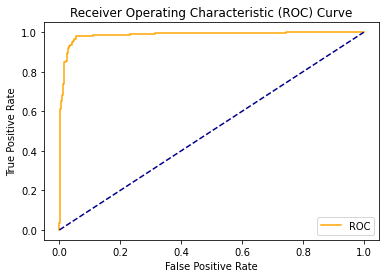

In [52]:
plot_roc_curve(fpr,tpr)

In [87]:
from sklearn.metrics import accuracy_score

accuracy_ls = []


for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(tpr),pd.Series(fpr), pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)


accuracy_ls.columns = ['tpr','fpr','thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,tpr,fpr,thresholds,accuracy
34,0.980000,0.053333,0.437103,0.961667
33,0.966667,0.053333,0.473669,0.958333
31,0.963333,0.050000,0.539696,0.958333
35,0.980000,0.070000,0.422643,0.956667
32,0.966667,0.050000,0.538659,0.956667


### Case2: ROC for each model

In [11]:
#ROC Curve
from sklearn.metrics import roc_curve
y_pred_prob1 = log_classifier.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = ada_classifier.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = rf_model.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = knn_classifier.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

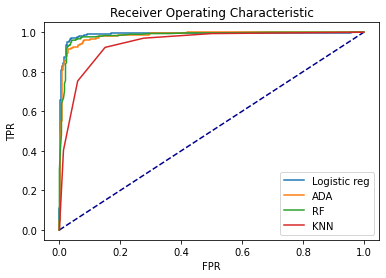

In [12]:


plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.plot(fpr1, tpr1, label= "Logistic reg")
plt.plot(fpr2, tpr2, label= "ADA")
plt.plot(fpr3, tpr3, label= "RF")
plt.plot(fpr4, tpr4, label= "KNN")


plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [49]:
def thresh_acc(tpr, fpr, thresholds, y_pred_prob):
    accuracy_ls = []

    for thres in thresholds:
        y_pred = np.where(y_pred_prob>thres,1,0)
        accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))

    accuracy_ls = pd.concat([pd.Series(tpr),pd.Series(fpr), pd.Series(thresholds), pd.Series(accuracy_ls)],
                            axis=1)


    accuracy_ls.columns = ['tpr','fpr','thresholds', 'accuracy']
    accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
    return(accuracy_ls.head())

In [51]:
#log_classifier
thresh_acc(tpr1, fpr1, thresholds1, y_pred_prob1)

,tpr,fpr,thresholds,accuracy
23,0.970000,0.040000,0.509092,0.966667
21,0.963333,0.036667,0.572811,0.965000
24,0.973333,0.040000,0.505748,0.965000
22,0.970000,0.036667,0.544222,0.965000
20,0.963333,0.033333,0.585992,0.963333


In [52]:
#ada_classifier
thresh_acc(tpr2, fpr2, thresholds2, y_pred_prob2)

,tpr,fpr,thresholds,accuracy
22,0.916667,0.026667,0.504561,0.943333
23,0.916667,0.036667,0.502760,0.941667
25,0.920000,0.043333,0.502366,0.940000
24,0.920000,0.036667,0.502402,0.940000
38,0.960000,0.080000,0.490344,0.938333


In [53]:
#rf_model
thresh_acc(tpr3, fpr3, thresholds3, y_pred_prob3)

,tpr,fpr,thresholds,accuracy
34,0.960000,0.043333,0.49,0.960000
35,0.960000,0.050000,0.48,0.958333
33,0.960000,0.040000,0.50,0.958333
32,0.956667,0.040000,0.52,0.955000
38,0.963333,0.056667,0.42,0.955000


In [54]:
#KNN
thresh_acc(tpr4, fpr4, thresholds4, y_pred_prob4)

,tpr,fpr,thresholds,accuracy
4,0.970000,0.276667,0.4,0.886667
3,0.923333,0.150000,0.6,0.846667
5,0.993333,0.500000,0.2,0.846667
6,1.000000,1.000000,0.0,0.746667
2,0.753333,0.060000,0.8,0.695000
